In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
df = pd.read_csv('./data/Coffee Shop Sales.csv')
df['date'] = df['transaction_date'] + '-' +  df['transaction_time']
df.drop(['transaction_date', 'transaction_time'], axis=1, inplace=True)
df['date'] = pd.to_datetime(df['date'], format = "mixed")
df.set_index('date', inplace=True)

df.head()

C:\Users\Siddhant\AppData\Local\Temp\ipykernel_24680\1714897933.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./data/Coffee Shop Sales.csv')


,transaction_id,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
date,,,,,,,,,
2023-01-01 07:06:11,1,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg
2023-01-01 07:08:56,2,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2023-01-01 07:14:04,3,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
2023-01-01 07:20:24,4,1,5,Lower Manhattan,,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm
2023-01-01 07:22:41,5,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg


# EDA

In [5]:
df['Month'] = df.index.month
df['Day'] = df.index.day
df['Day_name'] = df.index.day_name()

df['is_weekend'] = df.index.weekday > 4

df['Hour'] = df.index.hour

df['revenue'] = df['transaction_qty'] * df['unit_price']


daily_sales = df['transaction_qty'].resample('D').sum()
missing_days = daily_sales.isna().sum()

df.head()

,transaction_id,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,Month,Day,Day_name,is_weekend,Hour,revenue
date,,,,,,,,,,,,,,,
2023-01-01 07:06:11,1,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg,1,1,Sunday,True,7,6.0
2023-01-01 07:08:56,2,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,1,1,Sunday,True,7,6.2
2023-01-01 07:14:04,3,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,1,1,Sunday,True,7,9.0
2023-01-01 07:20:24,4,1,5,Lower Manhattan,,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm,1,1,Sunday,True,7,2.0
2023-01-01 07:22:41,5,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,1,1,Sunday,True,7,6.2


### PLOT - 1 : Sales By Hour

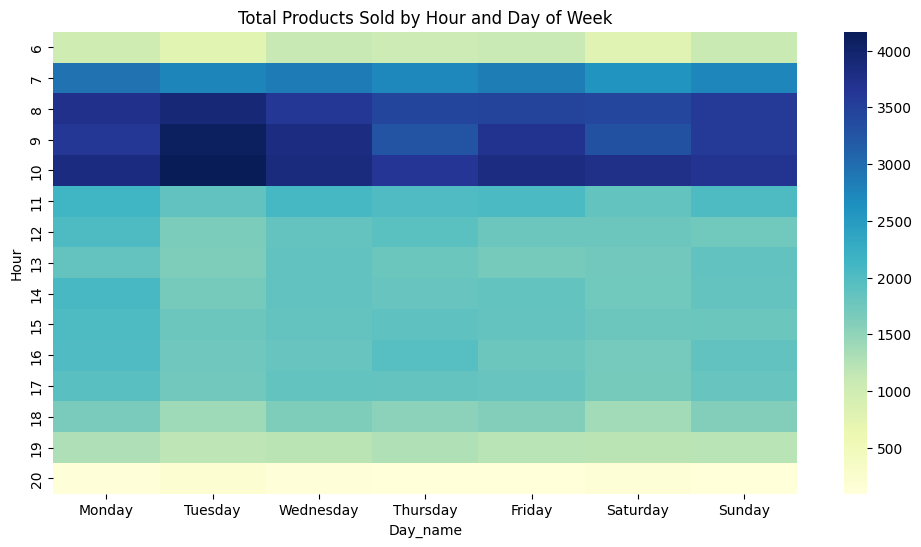

In [6]:
pivot_table = df.pivot_table(index='Hour', columns='Day_name', values='transaction_qty', aggfunc='sum')
pivot_table = pivot_table[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']]  # Ensure order

plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, cmap="YlGnBu")
plt.title('Total Products Sold by Hour and Day of Week')
plt.show()

In [10]:
df['Hour'] = pd.to_numeric(df['Hour'], errors='coerce')

# Clean missing or inconsistent data
df = df.dropna(subset=['Hour', 'Day_name', 'transaction_qty'])

# Create pivot table
pivot_table = df.pivot_table(
    index='Hour',
    columns='Day_name',
    values='transaction_qty',
    aggfunc='sum'
)

# Reorder days
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
existing_days = [day for day in day_order if day in pivot_table.columns]
pivot_table = pivot_table[existing_days]

# Reset index
pivot_table = pivot_table.reset_index()

# Melt to long format
df_long = pivot_table.melt(id_vars='Hour', var_name='Day', value_name='Total_Transactions')

# Plotly heatmap
fig = px.density_heatmap(
    df_long,
    x="Day",
    y="Hour",
    z="Total_Transactions",
    color_continuous_scale="YlGnBu",
    title="Total Products Sold by Hour and Day of Week",
    labels={'Total_Transactions': 'Products Sold'}
)

fig.update_layout(yaxis_nticks=len(df_long['Hour'].unique()), height=600)
fig.write_html("interactive_heatmap.html")
import webbrowser
webbrowser.open("interactive_heatmap.html")

True

In [11]:
df.head()

,transaction_id,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,Month,Day,Day_name,is_weekend,Hour,revenue
date,,,,,,,,,,,,,,,
2023-01-01 07:06:11,1,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg,1,1,Sunday,True,7,6.0
2023-01-01 07:08:56,2,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,1,1,Sunday,True,7,6.2
2023-01-01 07:14:04,3,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,1,1,Sunday,True,7,9.0
2023-01-01 07:20:24,4,1,5,Lower Manhattan,,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm,1,1,Sunday,True,7,2.0
2023-01-01 07:22:41,5,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,1,1,Sunday,True,7,6.2


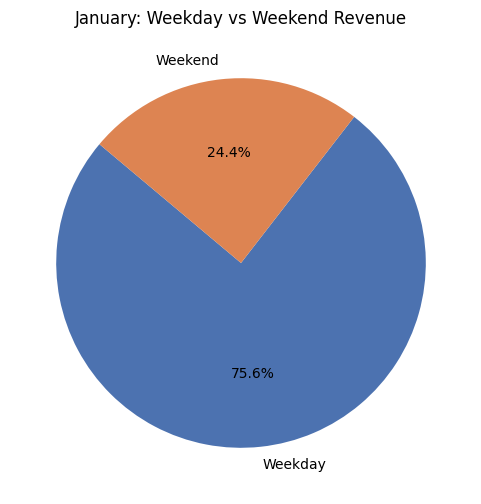

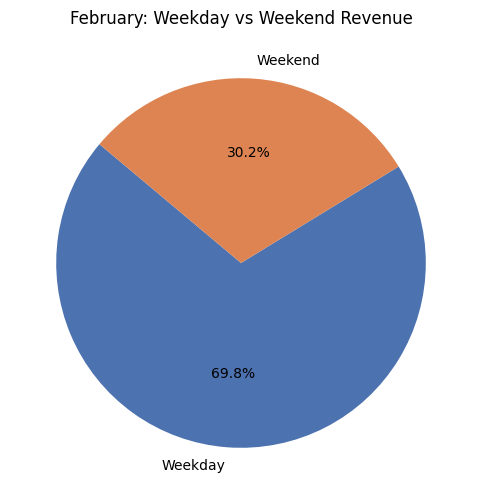

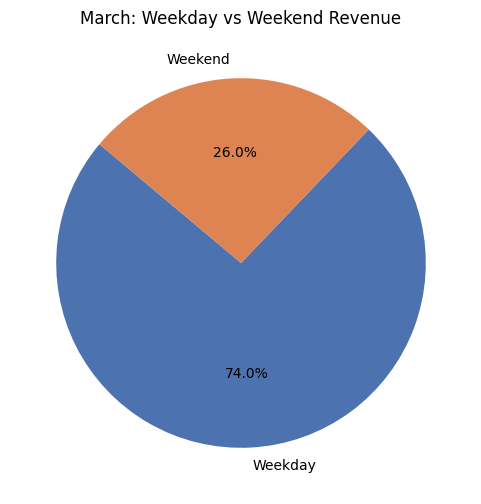

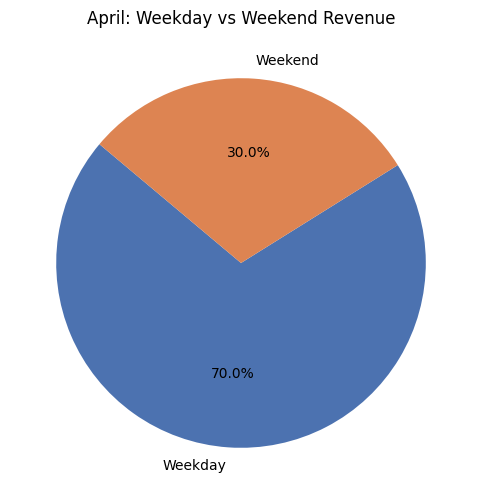

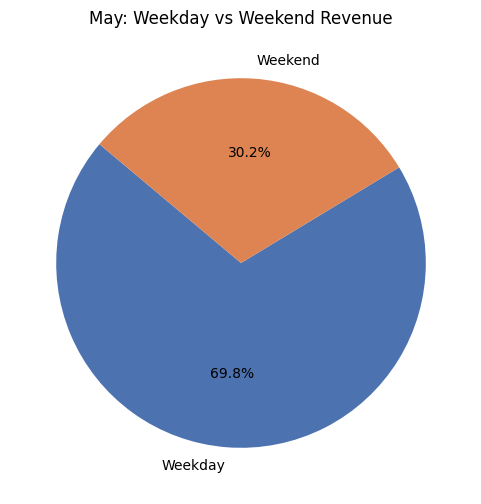

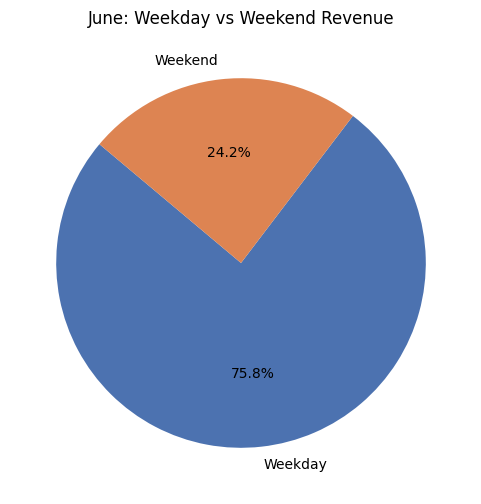

In [ ]:
import matplotlib.pyplot as plt

# Pie Chart for January
jan_data = df[df['Month'] == 1]
jan_rev = jan_data.groupby('is_weekend')['revenue'].sum()
jan_rev.index = jan_rev.index.map({False: 'Weekday', True: 'Weekend'})

plt.figure(figsize=(6, 6))
plt.pie(jan_rev, labels=jan_rev.index, autopct='%1.1f%%', startangle=140, colors=['#4c72b0', '#dd8452'])
plt.title('January: Weekday vs Weekend Revenue')
plt.show()


# Pie Chart for February
feb_data = df[df['Month'] == 2]
feb_rev = feb_data.groupby('is_weekend')['revenue'].sum()
feb_rev.index = feb_rev.index.map({False: 'Weekday', True: 'Weekend'})

plt.figure(figsize=(6, 6))
plt.pie(feb_rev, labels=feb_rev.index, autopct='%1.1f%%', startangle=140, colors=['#4c72b0', '#dd8452'])
plt.title('February: Weekday vs Weekend Revenue')
plt.show()


# Pie Chart for March
mar_data = df[df['Month'] == 3]
mar_rev = mar_data.groupby('is_weekend')['revenue'].sum()
mar_rev.index = mar_rev.index.map({False: 'Weekday', True: 'Weekend'})

plt.figure(figsize=(6, 6))
plt.pie(mar_rev, labels=mar_rev.index, autopct='%1.1f%%', startangle=140, colors=['#4c72b0', '#dd8452'])
plt.title('March: Weekday vs Weekend Revenue')
plt.show()


# Pie Chart for April
apr_data = df[df['Month'] == 4]
apr_rev = apr_data.groupby('is_weekend')['revenue'].sum()
apr_rev.index = apr_rev.index.map({False: 'Weekday', True: 'Weekend'})

plt.figure(figsize=(6, 6))
plt.pie(apr_rev, labels=apr_rev.index, autopct='%1.1f%%', startangle=140, colors=['#4c72b0', '#dd8452'])
plt.title('April: Weekday vs Weekend Revenue')
plt.show()


# Pie Chart for May
may_data = df[df['Month'] == 5]
may_rev = may_data.groupby('is_weekend')['revenue'].sum()
may_rev.index = may_rev.index.map({False: 'Weekday', True: 'Weekend'})

plt.figure(figsize=(6, 6))
plt.pie(may_rev, labels=may_rev.index, autopct='%1.1f%%', startangle=140, colors=['#4c72b0', '#dd8452'])
plt.title('May: Weekday vs Weekend Revenue')
plt.show()


# Pie Chart for June
jun_data = df[df['Month'] == 6]
jun_rev = jun_data.groupby('is_weekend')['revenue'].sum()
jun_rev.index = jun_rev.index.map({False: 'Weekday', True: 'Weekend'})

plt.figure(figsize=(6, 6))
plt.pie(jun_rev, labels=jun_rev.index, autopct='%1.1f%%', startangle=140, colors=['#4c72b0', '#dd8452'])
plt.title('June: Weekday vs Weekend Revenue')
plt.show()


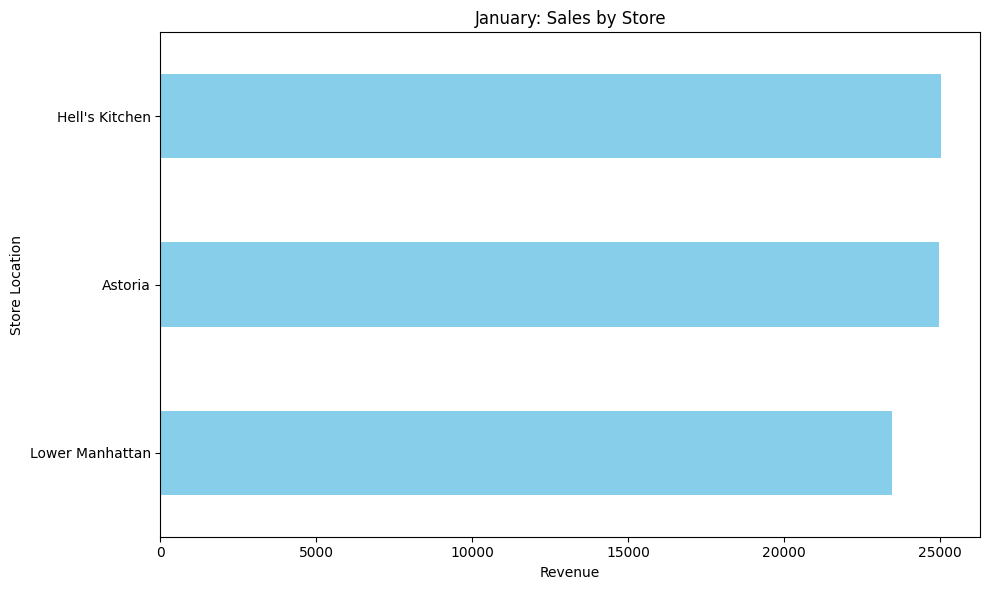

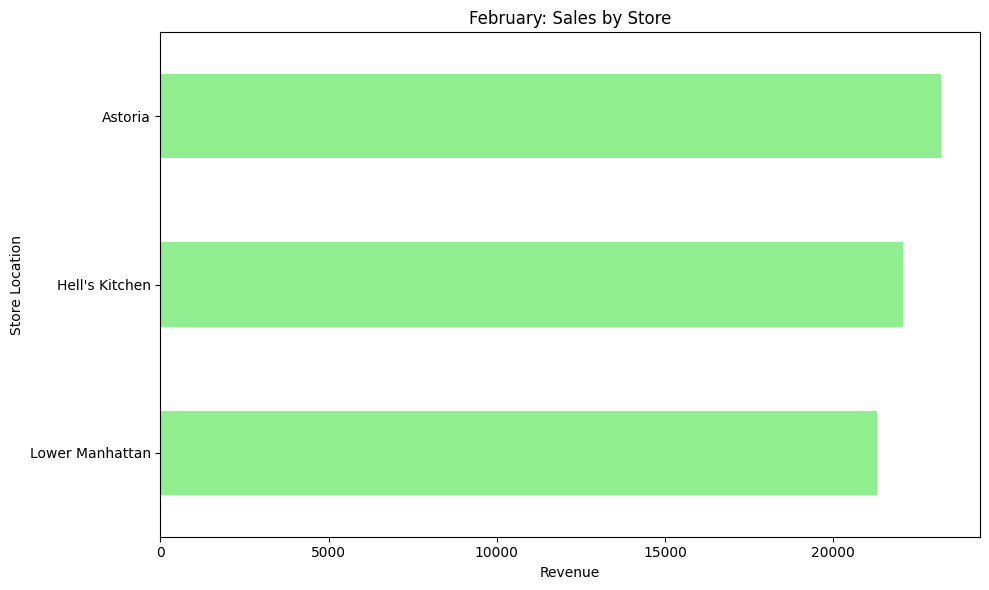

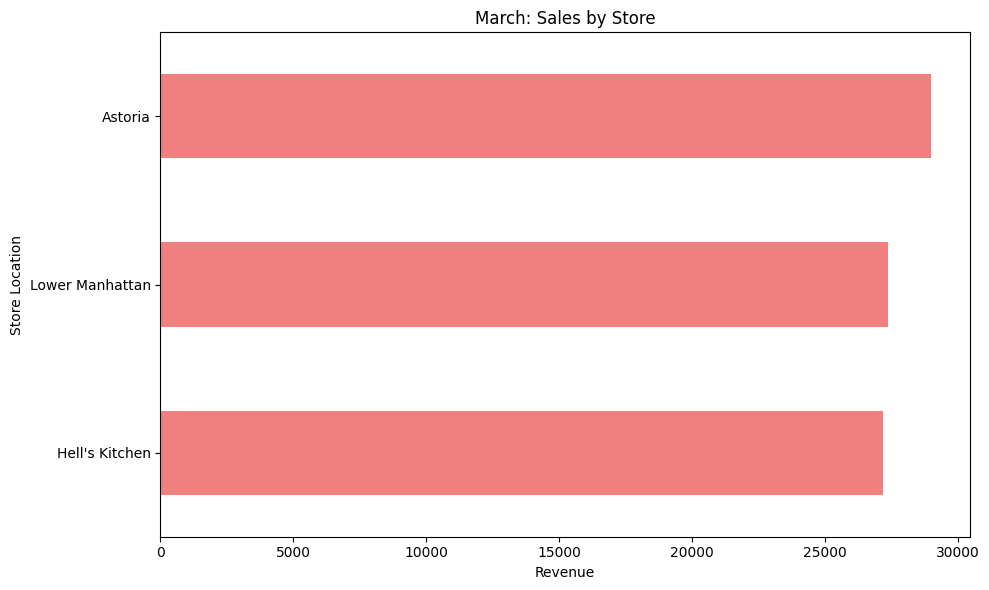

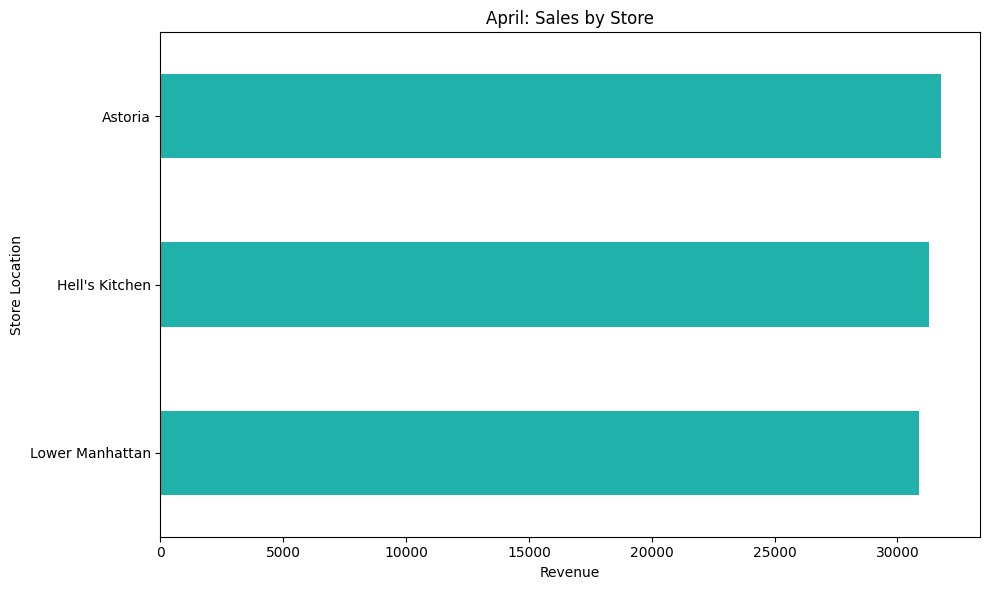

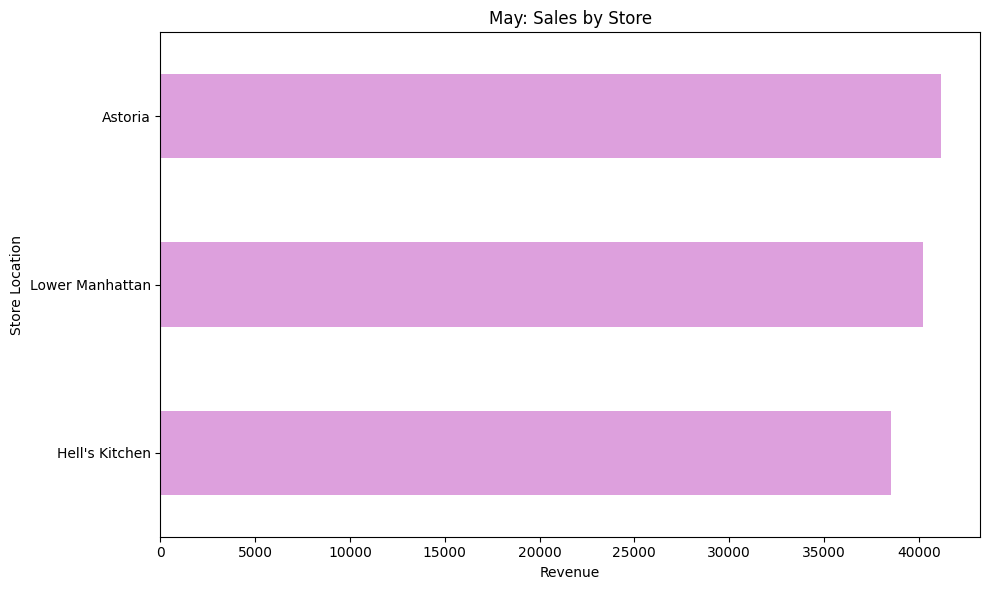

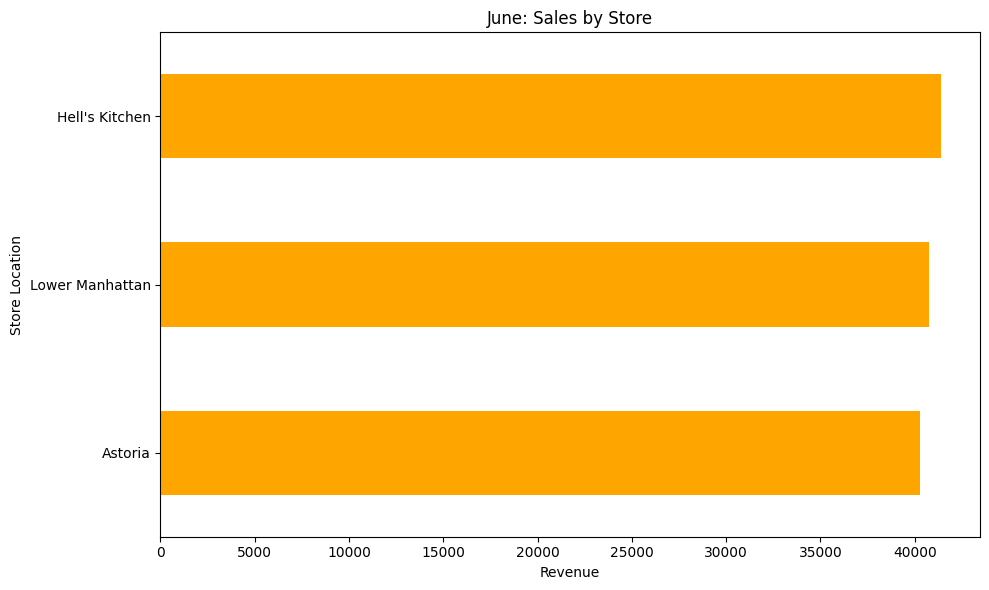

In [17]:
# Horizontal Bar Plot for January (Sales by Store)
jan_store_data = df[df['Month'] == 1]
jan_store_rev = jan_store_data.groupby('store_location')['revenue'].sum()

plt.figure(figsize=(10, 6))
jan_store_rev.sort_values().plot(kind='barh', color='skyblue')
plt.title('January: Sales by Store')
plt.xlabel('Revenue')
plt.ylabel('Store Location')
plt.tight_layout()
plt.show()


# Horizontal Bar Plot for February (Sales by Store)
feb_store_data = df[df['Month'] == 2]
feb_store_rev = feb_store_data.groupby('store_location')['revenue'].sum()

plt.figure(figsize=(10, 6))
feb_store_rev.sort_values().plot(kind='barh', color='lightgreen')
plt.title('February: Sales by Store')
plt.xlabel('Revenue')
plt.ylabel('Store Location')
plt.tight_layout()
plt.show()


# Horizontal Bar Plot for March (Sales by Store)
mar_store_data = df[df['Month'] == 3]
mar_store_rev = mar_store_data.groupby('store_location')['revenue'].sum()

plt.figure(figsize=(10, 6))
mar_store_rev.sort_values().plot(kind='barh', color='lightcoral')
plt.title('March: Sales by Store')
plt.xlabel('Revenue')
plt.ylabel('Store Location')
plt.tight_layout()
plt.show()


# Horizontal Bar Plot for April (Sales by Store)
apr_store_data = df[df['Month'] == 4]
apr_store_rev = apr_store_data.groupby('store_location')['revenue'].sum()

plt.figure(figsize=(10, 6))
apr_store_rev.sort_values().plot(kind='barh', color='lightseagreen')
plt.title('April: Sales by Store')
plt.xlabel('Revenue')
plt.ylabel('Store Location')
plt.tight_layout()
plt.show()


# Horizontal Bar Plot for May (Sales by Store)
may_store_data = df[df['Month'] == 5]
may_store_rev = may_store_data.groupby('store_location')['revenue'].sum()

plt.figure(figsize=(10, 6))
may_store_rev.sort_values().plot(kind='barh', color='plum')
plt.title('May: Sales by Store')
plt.xlabel('Revenue')
plt.ylabel('Store Location')
plt.tight_layout()
plt.show()


# Horizontal Bar Plot for June (Sales by Store)
jun_store_data = df[df['Month'] == 6]
jun_store_rev = jun_store_data.groupby('store_location')['revenue'].sum()

plt.figure(figsize=(10, 6))
jun_store_rev.sort_values().plot(kind='barh', color='orange')
plt.title('June: Sales by Store')
plt.xlabel('Revenue')
plt.ylabel('Store Location')
plt.tight_layout()
plt.show()
